In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

check_gpu = len(tf.config.list_physical_devices('GPU'))>0

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE")

Tensor Flow Version: 2.7.0
Keras Version: 2.7.0

Python 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
Scikit-Learn 1.0.1
GPU is available


# TF Regression

In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


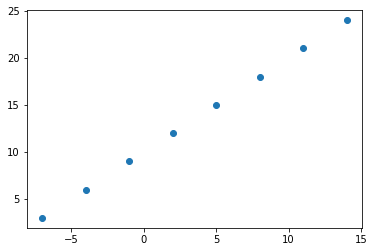

In [3]:
# creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# create features

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [5]:
# create a demo tensor for housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
# Turn our numpy array into tensors
X = tf.constant(X)
y= tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

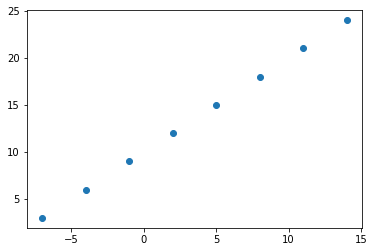

In [9]:
plt.scatter(X, y)

# Steps in Modelling With Tensorflow


Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1.create a model using sequential API
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2.compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
# Check out X and y 
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

🤔 Question: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, keras comes after tf (e.g. tf.keras.layers.Dense())?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.


# Improving Our Model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **reating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

<img src="https://camo.githubusercontent.com/8a6f2fb40aa18ccc247b10b13c8e8eaf91ae0f9960f839ce3a4e61b876571d57/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30322d696d70726f76696e672d612d6d6f64656c2d66726f6d2d6d6f64656c2d70657273706563746976652e706e67">

In [14]:
# Rebuilding the model with larger epochs

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 248ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 6m

1/1 [==============================] - 0s 6ms/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9262 - mae: 6.9262
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8981 - ma

In [15]:
# predict using the model
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

# Lets see if we can make another change to our code to improve the model

## Adding another layer

In [16]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])


# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1) ,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 226ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 4ms/step - loss: 3.7013 - mae: 3.7013
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7505 - mae: 3.7505
Epoch 91/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6921 - mae: 3.6921
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7522 - mae: 3.7522
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7251 - mae: 3.7251
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7105 - mae: 3.7105
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6979 - mae: 3.6979
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7194 - mae: 3.7194
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 3.6705 - mae: 3.6705
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7299 - ma

In [17]:
# lets evaluate the model predictions
model.predict([17.0])

array([[31.22314]], dtype=float32)

## Decreasing the numnber of neurons in hidden layer

In [18]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])


# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1) ,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 207ms/step - loss: 12.1456 - mae: 12.1456
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5538 - mae: 11.5538
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9405 - mae: 10.9405
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3009 - mae: 10.3009
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.6325 - mae: 9.6325
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9314 - mae: 8.9314
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1937 - mae: 8.1937
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3997 - mae: 7.3997
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5612 - mae: 6.5612
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 5.6630 - mae: 5.6630
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - los

1/1 [==============================] - 0s 4ms/step - loss: 3.7692 - mae: 3.7692
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7089 - mae: 3.7089
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7418 - mae: 3.7418
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7184 - mae: 3.7184
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7183 - mae: 3.7183
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7339 - mae: 3.7339
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6916 - mae: 3.6916
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7436 - mae: 3.7436
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 3.6771 - mae: 3.6771
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7389 - mae: 3.7389
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6866 - ma

In [19]:
# lets evaluate the model predictions
model.predict([17.0])

array([[32.454906]], dtype=float32)

## Removing the Activation fuction from hidden layer

In [20]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])


# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1) ,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 202ms/step - loss: 12.5419 - mae: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0344 - mae: 12.0344
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5205 - mae: 11.5205
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9976 - mae: 10.9976
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4629 - mae: 10.4629
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9137 - mae: 9.9137
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3473 - mae: 9.3473
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7606 - mae: 8.7606
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1507 - mae: 8.1507
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5144 - mae: 7.5144
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 5.5483 - mae: 5.5483
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 5.5181 - mae: 5.5181
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 5.4876 - mae: 5.4876
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 5.4567 - mae: 5.4567
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 5.4254 - mae: 5.4254
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3939 - mae: 5.3939
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3619 - mae: 5.3619
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3296 - mae: 5.3296
Epoch 97/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3150 - mae: 5.3150
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3422 - mae: 5.3422
Epoch 99/100
1/1 [==============================] - 0s 4ms/step - loss: 5.4287 - ma

In [21]:
# lets evaluate the model predictions
model.predict([17.0])

array([[29.522358]], dtype=float32)

## Changing from SGD to Adam Optimizers

In [22]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])


# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1) ,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 231ms/step - loss: 12.0125 - mae: 12.0125
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2511 - mae: 11.2511
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4828 - mae: 10.4828
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7066 - mae: 9.7066
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9205 - mae: 8.9205
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1219 - mae: 8.1219
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3078 - mae: 7.3078
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9190 - mae: 6.9190
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2155 - mae: 7.2155
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4987 - mae: 7.4987
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss:

1/1 [==============================] - 0s 4ms/step - loss: 0.3358 - mae: 0.3358
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2590 - mae: 0.2590
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1353 - mae: 0.1353
Epoch 92/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0938 - mae: 0.0938
Epoch 93/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2230 - mae: 0.2230
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2549 - mae: 0.2549
Epoch 95/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2267 - mae: 0.2267
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2664 - mae: 0.2664
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1667 - mae: 0.1667
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2064 - mae: 0.2064
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0645 - ma

In [23]:
# lets evaluate the model predictions
model.predict([17.0])

array([[26.26099]], dtype=float32)

# Evaluate a Model

A typical workflow you'll go through when building neural networks is:

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

1. The data - what data are you working with? What does it look like?
2. The model itself - what does the architecture look like? What are the different shapes?
3. The training of a model - how does a model perform while it learns?
4. The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?


In [24]:
# Make a bigger Dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [25]:
# make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

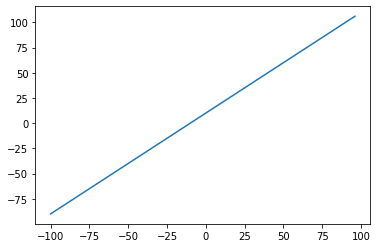

In [26]:
# Visualize the data
plt.plot(X,y)

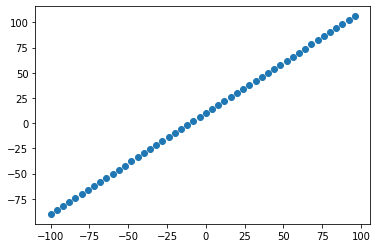

In [27]:
plt.scatter(X,y)

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

1. Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
2. Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
3. Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

In [28]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

print(len(X_train))
print(len(X_test))

40
10


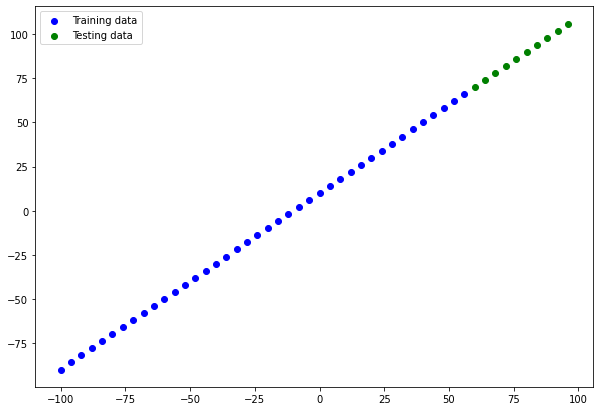

In [29]:
# Visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")

plt.legend()

In [30]:
# lets build a model to predict the values for the above dataset

# build the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# compile the model
model1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])

# fitting the model
model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 26.9568 - mae: 26.9568
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2571 - mae: 9.2571
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.8091 - mae: 7.8091
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 8.7897 - mae: 8.7897
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7443 - mae: 10.7443
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9378 - mae: 9.9378
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.9948 - mae: 8.9948
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0815 - mae: 9.0815
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.8113 - mae: 19.8113
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.7048 - mae: 10.7048
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss:

2/2 [==============================] - 0s 4ms/step - loss: 9.9562 - mae: 9.9562
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.2526 - mae: 7.2526
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 12.7211 - mae: 12.7211
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3199 - mae: 7.3199
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6852 - mae: 7.6852
Epoch 93/100
2/2 [==============================] - 0s 3ms/step - loss: 7.1161 - mae: 7.1161
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5661 - mae: 12.5661
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9407 - mae: 9.9407
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1287 - mae: 9.1287
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 12.0596 - mae: 12.0596
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 9.087

In [31]:
# Visualize the model
model1.summary()

# (if we run the summary command without model.fit, it will throw an error)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


the cell above errors because we haven't fit our built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [49]:
# lets create a model which builds automatically by defining the input shape argument

tf.random.set_seed(42)

#create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="intial_models")

# compile the model
model2.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [50]:
# we can see that we get model summary without model fit
model2.summary()

Model: "intial_models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

1. Total params - total number of parameters in the model.
2. Trainable parameters - these are the parameters (patterns) the model can update as it trains.
3. Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [51]:
# lets fit the model to the training data
model2.fit(X_train, y_train, epochs=100, verbose=0)

### plot model function

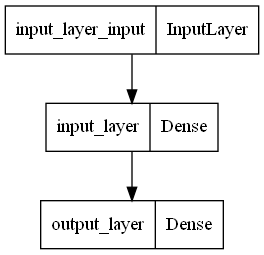

In [52]:
from tensorflow.keras.utils import plot_model

plot_model(model=model2)

In [53]:
# !pip install pydot

In [54]:
# !pip install graphviz

In [55]:
import pydot
import graphviz

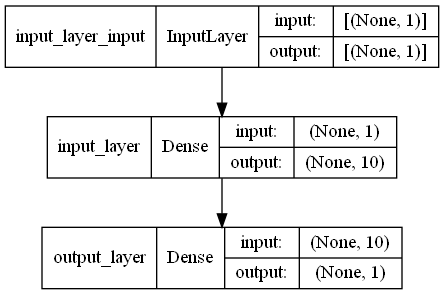

In [56]:
plot_model(model=model2, show_shapes=True)

### Visualize model predictions

In [61]:
y_preds = model2.predict(X_test)
y_preds

array([[ 70.55221 ],
       [ 75.13994 ],
       [ 79.72765 ],
       [ 84.315384],
       [ 88.903114],
       [ 93.49084 ],
       [ 98.07856 ],
       [102.66628 ],
       [107.25401 ],
       [111.841736]], dtype=float32)

In [62]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

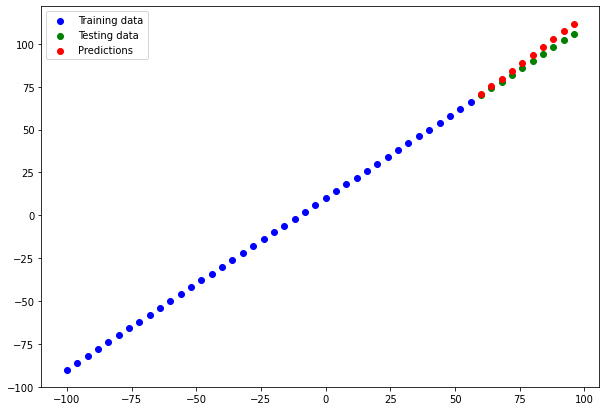

In [63]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

### Regression Evaluation Metrics for model

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

1. Mean absolute error (MAE) - the mean difference between each of the predictions.
2. Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [65]:
# Evaluate model on test
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 163ms/step - loss: 3.1970 - mae: 3.1970


[3.196972608566284, 3.196972608566284]

In [67]:
# calculate MAE 
mae = tf.metrics.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558233, 14.116037, 11.708939, 10.336924, 10.      , 10.698168,
       12.447136, 15.333026, 19.254013, 23.841736], dtype=float32)>

Huh? That's strange, MAE should be a single output.
Instead, we get 10 values.
This is because our y_test and y_preds tensors are different shapes

In [68]:
# convert y_test and y_pred into tensors and recalculate MAE
mae2 = tf.metrics.MAE(tf.constant(y_test),tf.constant(y_pred))
mae2

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558233, 14.116037, 11.708939, 10.336924, 10.      , 10.698168,
       12.447136, 15.333026, 19.254013, 23.841736], dtype=float32)>

we get the same output

**we need to make sure the size of tensors is same**

In [71]:
# Recalculate MAE
mae3 =tf.metrics.MAE(y_test,
                    y_pred = tf.squeeze(tf.constant(y_pred)))
print(mae3)

tf.Tensor(3.1969726, shape=(), dtype=float32)


In [73]:
# Calculate MSE
mse = tf.metrics.MSE(y_test,
                    y_pred = tf.squeeze(tf.constant(y_pred)))
print(mse)

tf.Tensor(13.070358, shape=(), dtype=float32)


In [76]:
# Calculate Huber
huber = tf.keras.losses.Huber()
huber(y_test,y_pred = tf.squeeze(tf.constant(y_pred))).numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=2.7069983>>

In [100]:
# create loss functions for reuse

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       tf.squeeze(y_pred))

# Running Experiments to Improve Our Model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.


### Model1

In [95]:
tf.random.set_seed(42)

# 1.create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6834 - mae: 12.6834
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 8

In [96]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>

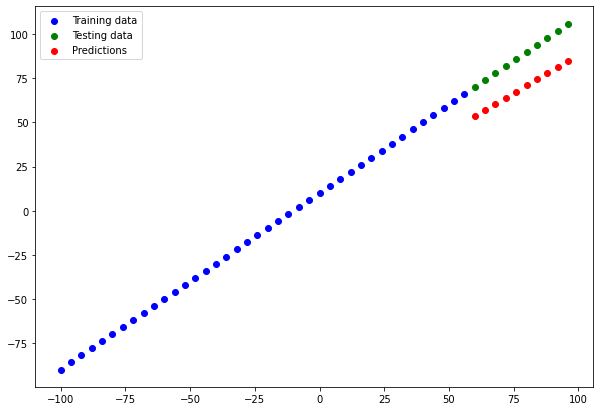

In [97]:
# make and plot predictions for this model
y_preds_1 = model_1.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [103]:
# calculate model_1 evaluations
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
print(mae_1)
print(mse_1)

tf.Tensor(18.745327, shape=(), dtype=float32)
tf.Tensor(353.5734, shape=(), dtype=float32)


### Model2

In [107]:
tf.random.set_seed(42)

#create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#complile the model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mse"])

#fit the model
model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8954
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6622
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0093
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mse: 1094.4385
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 6ms/step - loss: 15.2862 - mse: 315.3605
Epoch 87/100
2/2 [==============================] - 0s 6ms/step - loss: 19.1086 - mse: 521.2532
Epoch 88/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8229 - mse: 1287.1917
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1742 - mse: 124.1342
Epoch 90/100
2/2 [==============================] - 0s 6ms/step - loss: 21.5240 - mse: 663.8617
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5716 - mse: 161.7467
Epoch 92/100
2/2 [==============================] - 0s 7ms/step - loss: 18.3977 - mse: 464.1331
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 7.4138 - mse: 81.9819
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 17.7380 - mse: 445.7386
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1144 - mse: 164.0824
Epoch 96/100
2/2 [==============================] - 0s

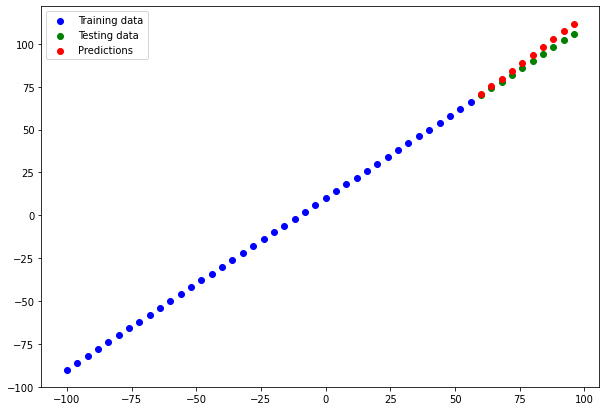

In [110]:
y_pred_2 = model2.predict(X_test)

plot_predictions(predictions = y_pred_2)

In [112]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
print(mae_2, mse_2)

tf.Tensor(3.1969726, shape=(), dtype=float32) tf.Tensor(13.070358, shape=(), dtype=float32)


## Model3

In [113]:
tf.random.set_seed(42)

#create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#complile the model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mse"])

#fit the model
model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8954
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mse: 168.6622
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.4763 - mse: 2586.0093
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4385
Epoch 11/500
2/2 [==========================

2/2 [==============================] - 0s 6ms/step - loss: 15.2862 - mse: 315.3605
Epoch 87/500
2/2 [==============================] - 0s 8ms/step - loss: 19.1086 - mse: 521.2532
Epoch 88/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8229 - mse: 1287.1917
Epoch 89/500
2/2 [==============================] - 0s 8ms/step - loss: 10.1742 - mse: 124.1342
Epoch 90/500
2/2 [==============================] - 0s 7ms/step - loss: 21.5240 - mse: 663.8617
Epoch 91/500
2/2 [==============================] - 0s 7ms/step - loss: 10.5716 - mse: 161.7467
Epoch 92/500
2/2 [==============================] - 0s 7ms/step - loss: 18.3977 - mse: 464.1331
Epoch 93/500
2/2 [==============================] - 0s 7ms/step - loss: 7.4138 - mse: 81.9819
Epoch 94/500
2/2 [==============================] - 0s 8ms/step - loss: 17.7380 - mse: 445.7386
Epoch 95/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1144 - mse: 164.0824
Epoch 96/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 6ms/step - loss: 18.0464 - mse: 503.4532
Epoch 172/500
2/2 [==============================] - 0s 8ms/step - loss: 28.8377 - mse: 1305.7987
Epoch 173/500
2/2 [==============================] - 0s 7ms/step - loss: 16.5279 - mse: 432.1443
Epoch 174/500
2/2 [==============================] - 0s 7ms/step - loss: 11.2115 - mse: 199.9691
Epoch 175/500
2/2 [==============================] - 0s 8ms/step - loss: 27.5839 - mse: 1097.8187
Epoch 176/500
2/2 [==============================] - 0s 6ms/step - loss: 8.2680 - mse: 77.5372
Epoch 177/500
2/2 [==============================] - 0s 7ms/step - loss: 9.2580 - mse: 108.9075
Epoch 178/500
2/2 [==============================] - 0s 6ms/step - loss: 18.1440 - mse: 466.0512
Epoch 179/500
2/2 [==============================] - 0s 8ms/step - loss: 10.5995 - mse: 147.8543
Epoch 180/500
2/2 [==============================] - 0s 6ms/step - loss: 7.8992 - mse: 100.6932
Epoch 181/500
2/2 [===========================

2/2 [==============================] - 0s 6ms/step - loss: 24.7126 - mse: 882.9659
Epoch 256/500
2/2 [==============================] - 0s 5ms/step - loss: 12.4220 - mse: 220.3515
Epoch 257/500
2/2 [==============================] - 0s 6ms/step - loss: 10.5823 - mse: 164.0439
Epoch 258/500
2/2 [==============================] - 0s 6ms/step - loss: 14.4883 - mse: 322.3509
Epoch 259/500
2/2 [==============================] - 0s 6ms/step - loss: 8.6132 - mse: 98.6932
Epoch 260/500
2/2 [==============================] - 0s 6ms/step - loss: 43.0580 - mse: 2975.2305
Epoch 261/500
2/2 [==============================] - 0s 6ms/step - loss: 18.4611 - mse: 493.6658
Epoch 262/500
2/2 [==============================] - 0s 6ms/step - loss: 6.8820 - mse: 94.3407
Epoch 263/500
2/2 [==============================] - 0s 8ms/step - loss: 13.7211 - mse: 268.5679
Epoch 264/500
2/2 [==============================] - 0s 6ms/step - loss: 21.0154 - mse: 653.9619
Epoch 265/500
2/2 [============================

2/2 [==============================] - 0s 7ms/step - loss: 35.0762 - mse: 1849.1555
Epoch 340/500
2/2 [==============================] - 0s 6ms/step - loss: 10.4192 - mse: 181.4145
Epoch 341/500
2/2 [==============================] - 0s 7ms/step - loss: 9.7625 - mse: 156.3230
Epoch 342/500
2/2 [==============================] - 0s 6ms/step - loss: 11.9500 - mse: 188.5578
Epoch 343/500
2/2 [==============================] - 0s 8ms/step - loss: 9.3943 - mse: 145.3949
Epoch 344/500
2/2 [==============================] - 0s 7ms/step - loss: 5.6071 - mse: 44.6760
Epoch 345/500
2/2 [==============================] - 0s 6ms/step - loss: 37.4876 - mse: 2291.7798
Epoch 346/500
2/2 [==============================] - 0s 6ms/step - loss: 16.8830 - mse: 411.1353
Epoch 347/500
2/2 [==============================] - 0s 6ms/step - loss: 12.8748 - mse: 281.5983
Epoch 348/500
2/2 [==============================] - 0s 8ms/step - loss: 8.1960 - mse: 162.6963
Epoch 349/500
2/2 [============================

2/2 [==============================] - 0s 8ms/step - loss: 25.3789 - mse: 907.6141
Epoch 424/500
2/2 [==============================] - 0s 6ms/step - loss: 15.1031 - mse: 369.3288
Epoch 425/500
2/2 [==============================] - 0s 6ms/step - loss: 7.1643 - mse: 75.3718
Epoch 426/500
2/2 [==============================] - 0s 6ms/step - loss: 20.3318 - mse: 572.0352
Epoch 427/500
2/2 [==============================] - 0s 8ms/step - loss: 6.3283 - mse: 84.9745
Epoch 428/500
2/2 [==============================] - 0s 7ms/step - loss: 12.9961 - mse: 288.4218
Epoch 429/500
2/2 [==============================] - 0s 8ms/step - loss: 10.7869 - mse: 192.7741
Epoch 430/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4007 - mse: 248.2724
Epoch 431/500
2/2 [==============================] - 0s 7ms/step - loss: 10.6152 - mse: 218.3398
Epoch 432/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4582 - mse: 239.2198
Epoch 433/500
2/2 [=============================

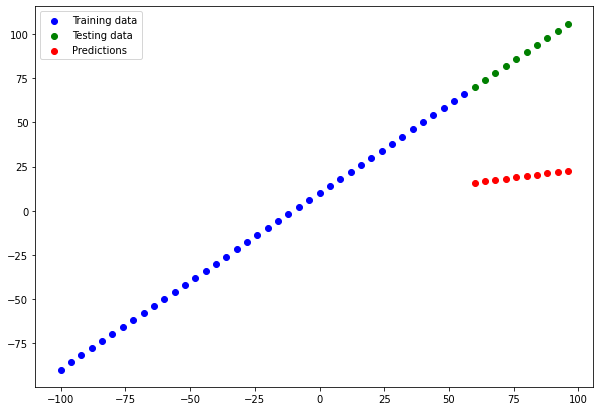

In [114]:
y_pred_3 = model2.predict(X_test)

plot_predictions(predictions = y_pred_3)

In [115]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
print(mae_3, mse_3)

tf.Tensor(68.71362, shape=(), dtype=float32) tf.Tensor(4808.029, shape=(), dtype=float32)


# Comparing The Results

In [119]:
model_Results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mse_3.numpy(), mse_3.numpy()]]

In [120]:
import pandas as pd
results = pd.DataFrame(model_Results, columns=["model", "mae", "mse"])
results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196973,13.070358
2,model_3,4808.028809,4808.028809


# Tracking Your Experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

 📖 Resource: But as you build more models, you'll want to look into using tools such as:

1. **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
2. **Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving Our Models

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. **The SavedModel format (default)**.
2. **The HDF5 format.**

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel 

In [123]:
# Save a model using SavedModel Format
model2.save("best_model_SavedModelFormat")

INFO:tensorflow:Assets written to: best_model_SavedModelFormat\assets


In [122]:
# Save a model using HDC5 model
model2.save("best_model_hdf5_format")

INFO:tensorflow:Assets written to: best_model_hdf5_format\assets


# Loading Models

In [126]:
# Load the SavedModel format Model

loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModelFormat")
loaded_SavedModel_format.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                20        
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [129]:
# comparing model2 predictions with SavedModel format model 
model_2_preds = model2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [131]:
# Load a model from the HDF5 format

loaded_h5_model = tf.keras.models.load_model("best_model_hdf5_format")
loaded_h5_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                20        
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [133]:
# comparing model2 predictions with HDF5 format model 
model_2_preds = model2.predict(X_test)
loaded_hdf5_format_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_hdf5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])